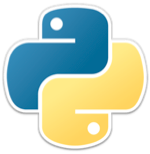


# Python Coding Club

This series is to introduce Python as a programming language to be used for data analysis, scientific computing and plotting. It is by __no means comprehensive__ but will provide a basis for further investigation and exploration into this powerful language. These notes are __best visualised__ in a __Jupyter Notebook__ and I encourage you to __follow along__ in your __preferred IDE__.

# Part 7: Scientific Libraries Overview - I

Part 7 of this series builds on the the import statements and our knowledge of modules and packages we learned in Part 6.

Specifically in this part I will cover some common libraries used for scientific data analysis such as `numpy` and `matplotlib`. In the second section of this part I will cover more the libraries `scipy` for scientific data analysis and `pandas` for data tabulation and loading. 

I will cover what the libraries are mainly used for and a few notable functionalities for each. 

Lastly, I will briefly mention other noteable libraries and what they can be used for, however it is out of the scope of this course to go into depth for each one.

# Part 7.1: Numpy

For a first look at a useful package, I will demonstrate probably the most well known package for numerical analysis, `numpy`. 

First make sure you have `numpy` installed.

In [ ]:
!pip install numpy

`numpy` is typically imported given the alias `np`.

In [ ]:
import numpy as np

## Arrays

The main functionality of `numpy` lies in the `numpy.ndarray` or multi-dimensional array. This object is similar to a python list, but all the elements must be of the same data type (i.e. float etc.). The array has interesting properties.

In [ ]:
arr = np.array([1,4,2,4,5,5,1,1])
print(type(arr))

We can view the data type of the elements of the array using the `.dtype` attribute

In [ ]:
arr.dtype

Now we can add or subtract element-wise from an array.

In [ ]:
print(arr-2)

In [ ]:
print(arr*arr)

Arrays can be sliced just like python lists.

In [ ]:
print(arr[:4])

In [ ]:
print(arr[::2])

The `.shape` attribute can show the dimensions of the array.

In [ ]:
arr.shape

Since `arr` is only one dimensional, the shape is simply only `8` elements long.

In [ ]:
arr2 = np.array([arr,arr,arr])
print(arr2.shape)

In [ ]:
print(arr2)

Now you can see we have a 3 by 8 dimensional array.

Slicing an array with dimension >1 can be achieved.

In [ ]:
arr2[1] += 4
print(arr2, '\n')
print(arr2[1])

Individual elements can be accessed using double slice notation.

In [ ]:
print(arr2[1][3])
print(arr2[1,3])

We can reshape the array using the `.reshape()` method, so long as the elements remain the same, for instance `3*8 = 24 = 6*4`.

In [ ]:
arr3 = arr2.reshape(6, 4)
print(arr3)

In [ ]:
print(arr3-6)

We can also do boolean expressions with arrays such as:

In [ ]:
arr4 = arr3 > 3
print(arr4)

This produces a boolean array with each value being subjected to the expression `> 3`.

This can then be used to find the values from `arr3` that are `True` by using a boolean slicing method.

In [ ]:
arr5 = arr3[arr4]
print(arr5)

In [ ]:
arr5.shape

We can also set values based on this indexing. The `~` means **not** in this case, therefore the below expression is setting each value that is `False` to `0`.

In [ ]:
arr3[~arr4] = 0

In [ ]:
arr3

Two arrays can be broadcast together.

In [ ]:
arr5 = arr3.copy()
arr5[::2] *= 3
print(arr5)

Division by zero causes a `nan` or 'not a number' value to be given.

In [ ]:
arr6 = arr5/arr3
print(arr6)

We can set these back to zero by using the `np.isnan()` function on the array and using that as a boolean mask for the array.

In [ ]:
nan = np.isnan(arr6)
arr6[nan] = 0
arr6

Arrays can also be used for matrix multiplication, usually this is done with the `np.dot` function.

In [ ]:
print(arr6.T.shape)
print(arr6.T)

The `.T` attibute is the transpose of the array.

In [ ]:
print(arr3.shape)
print(arr3)

In [ ]:
print(np.dot(arr6.T, arr3), '\n')
print(np.dot(arr6.T, arr3).shape)

However this can also be done via the `@` symbol.

In [ ]:
print(arr6.T @ arr3)

The `.sum()` method accumulates all the values in the array.

In [ ]:
print(arr6.sum())

Specifying an axis to sum over produces either column (axis=1) or row (axis=0) summation.

In [ ]:
print(arr6.sum(axis=0))

In [ ]:
print(arr6.sum(axis=1))

In [ ]:
print(arr6.sum(axis=1).reshape(1,6))

In [ ]:
arr7 = arr6.sum(axis=1).reshape(1,6)

In [ ]:
arr7

Two arrays can be concatenated via `np.concatenate`

Specifying the axis determines whether to create a new array concatenated on columns (`axis=1`) or rows (`axis=0`)

In [ ]:
arr8 = np.concatenate([arr7, arr7], axis=0)

In [ ]:
print(arr8)

In [ ]:
arr9 = np.concatenate([arr7, arr7], axis=1)
print(arr9)

Lots of the following manipulations may seem trivial, but it is very useful to use `numpy` arrays for data processing, especially of a numeric value.

Arrays can also be passed into functions as an argument, and the function will act on each element of the array.

In [ ]:
def square(x):
    return x**2

In [ ]:
arr10 = square(arr8)
print(arr10)

For things such as evaluating each boolean expression on an array, a function can be **vectorized** by **decorating** the function with the `@np.vectorize` decorator.

Decorators are outside the scope of this series, but in brief, writing the above is essentially the same as typing:

`below5 = np.vectorize(below5)`.

In [ ]:
@np.vectorize
def below5(x):
    if x < 5:
        return 0
    else:
        return x

In [ ]:
arr11 = below5(arr8)
print(arr11)

This then has the desired result, any value less than five is outputted as 0, whilst every other value is the same.

## Exercise 7.1: Unit conversion

One thing that arrays are very useful for, is that they can convert units without the need for `for` or `while` loops over each element of the array. 

In this exercise, you will convert the following wavelength data into electron volts using a numpy array. 

Secondly, find what electron volts have an intensity above 10,000 by using boolean indexing.

The conversion equation is shown below:
$$
\frac{hc}{e\lambda} = \frac{J}{e} = eV
$$

Where $h$ is Planck's constant, $c$ is the speed of light in a vacuum, $J$ is the energy in Joules, $e$ is the elementary charge on an electron, $\lambda$ is the wavelength and $eV$ is electron volts.

Run the cell below to set up the data and for a quick visualisation.

In [ ]:
# For visualisation.
import matplotlib.pyplot as plt
%matplotlib inline  

def lorentzianModel(mu, gamma, height):    # To help produce intensities.
    def evaluate(x):
        return height/(((x-mu)/gamma)**2 +1)
    return evaluate

peaks = [[450, 10, 15000], [550, 5, 20000], [650, 16, 11000]]   # Three sets of parameters.
peak_model = [lorentzianModel(*peak) for peak in peaks]         # Make three peaks

wavelength = list(range(200,1000))                               # Purely python list setting up.
intensity = [sum(peak(x) for peak in peak_model) for x in wavelength]  # producing intensities.
fig, ax1 = plt.subplots(1, 1, figsize=(12, 4))
ax1.plot(wavelength, intensity)
ax1.set_xlabel('Wavelength / nm')
ax1.set_ylabel('Intensity')

Fill in the below code to produce the array of electron volt values by the conversion above, without using for loops.

In [ ]:
# -----------------------------------------------------------------------------------------------------
# For this section, turn the wavelength and intensity into arrays, perhaps define some useful variables.





# -----------------------------------------------------------------------------------------------------

# Produce arrays for electron volts by using the conversion.
electron_volts = # WRITE CONVERSION HERE
print(f"Subset of eVs:")
print(electron_volts[::25])
print(f"\nSubset of wavelengths:")
print(wavelength[::25])

Now find the electron volts and wavelengths with an intensity over 10000 by boolean indexing.

In [ ]:
# Create a boolean array of intensities greater than 10000.
intensity_over_10000 = # CREATE BOOLEAN ARRAY HERE

# -----------------------------------------------------------------------------------------------------

# Print the electron volts and wavelengths that have an intensity over 10000.
print(f'eVs where intensity is > 10000:\n{electron_volts[intensity_over_10000]}\n')
print(f'Wavelengths where intensity is > 10000:\n{wavelength[intensity_over_10000]}')
# -----------------------------------------------------------------------------------------------------

Next use `np.argmax()` and boolean slicing to find the electron volts associated with each peak.

To do this, use a list comprehension or for loop to loop over the wavelengths `450`, `550` and `650`. Create a boolean index of wavelengths that fall beside 50 of each side of each wavelength.
Then create another another list comprehension, which selects the electron volts from each region that have the highest intensity, by using `np.argmax()` on the intensity values of each region.

Set `peak_evs` to be a list/array containing the electron volts for the maximum values in each given region.
Set `peak_intens` to be the maximum intensity for each region.

In [ ]:
# -------------------------------------------------------------------------------------------
between = # CREATE ARRAY OF BOOLEAN ARRAYS FOR EACH REGION 
peak_evs = # FIND EV FOR MAXIMUM INTENSITY IN EACH REGION.
peak_intens = # FIND MAXIMUM INTENSITY FOR EACH REGION
print(f'eV for highest intensity between 400-500 nm:\t {peak_evs[0]:.2f} eV')
print(f'eV for highest intensity between 500-600 nm:\t {peak_evs[1]:.2f} eV')
print(f'eV for highest intensity between 600-700 nm:\t {peak_evs[2]:.2f} eV')
# -------------------------------------------------------------------------------------------

Plotting for visualisation.

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
ax1.plot(wavelength, intensity)
ax2.plot(electron_volts[::-1], intensity[::-1])
ax1.set_xlabel('Wavelength / nm')
ax2.set_xlabel('Electron volts / eV')
ax1.set_ylabel('Intensity')
ax2.set_ylabel('Intensity')

# Filling the areas that are higher than 
colors = ['b', 'g', 'r']
for i, wvlngth in enumerate([450, 550, 650]):
    ax1.fill_between(wavelength[(intensity_over_10000) & (wavelength < wvlngth+75) & (wavelength > wvlngth-75)], y1=0, 
                 y2=intensity[(intensity_over_10000) & (wavelength < wvlngth+75) & (wavelength > wvlngth-75)], 
                     color=colors[i], alpha=0.5)
for i, ev in enumerate([wave_2_ev(450), wave_2_ev(550), wave_2_ev(650)]):
    ax2.fill_between(electron_volts[(intensity_over_10000) & (electron_volts < ev+0.05) & (electron_volts > ev-0.05)], 
                     y1=0, y2=intensity[(intensity_over_10000) & (electron_volts < ev+0.05) & (electron_volts > ev-0.05)], 
                     color=colors[i], alpha=0.5)
ax2.vlines(peak_evs, ymin=0, ymax=peak_intens, color='r', ls=':')
ax2.invert_xaxis()
plt.tight_layout()

This exercise shows the use of using numpy for numerical analysis by indexing using boolean arrays and for efficient manipulations/conversions of data.

## Other array generating functions

Apart from `np.array()`, there are many other functions from `numpy` that generate `ndarray` objects.

In [ ]:
print(f'Linspace function: \n{np.linspace(0,100,51)}\nlength: {len(np.linspace(0,100,51))}\n')
print(f'Arange function: \n{np.arange(0,100,10)}\n\n')
print(f'Zeros function: \n{np.zeros((4,4))}\n\n')
print(f'Ones function: \n{np.ones((4,4))}\n\n')

The `np.linspace()` function generates linearly spaced values from `start` to `end` inclusively. The third argument is the number of spaces between the `start` and `end` values, for instance, in the function call above, 51 spaces was given, therefore running `len(np.linspace(0,100,51))` will return `51`.

The `np.arange()` function is identical to the in-built `range()` function but returns an `ndarray` object rather than a `range` object. The `end` is exclusive, as is the case with `range()`.

The functions `np.zeros` and `np.ones` both generate an `ndarray` of `shape` provided by a tuple of dimensions, filled with either all zeros or all ones respectively. For instance in the above code, the shape provided was `(4, 4)` meaning four rows and four columns, producing a 2D array. 

There are many other notable functions and classes provided by `numpy`, the best place to find them is to check the `dir()` of the library, find a class/function that sounds interesting and view the [documentation on it here](https://numpy.org/doc/1.18/).

In [ ]:
dir(np)

Just for interest sake, `numpy` includes a `Polynomial` class in its `polynomial` module, as well as all well known standard functions such as `np.sqrt()` for $\sqrt{}$, `np.sin`, `np.arcsin`, `np.e`, `np.pi` etc.

These functions all act in an expected fashion and variables such as `np.e` and `np.pi` being the appropriate values of Euler's number and $\pi$ repsectively.

## Convolution example with numpy

Additionally functions like `np.convolve()` can take a filter and a function and convolute them together.

In [ ]:
def step(x, mid):   # Define step function
    output = np.zeros(x.size)
    mid_index = max(np.where(x <= mid)[0])
    output[mid_index:] = 1.0
    return output

def gaussian(x, center, amp, sigma):   # Define gaussian
    return (amp / (np.sqrt(2*np.pi) * sigma)) * np.exp(-(x-center)**2 / (2*sigma**2))


x = np.linspace(0, 10, 501)   # X range
y = step(x, mid=5.0)       # y step function
kernel = gaussian(x, 5, amp=0.62, sigma=0.59)    # gaussian kernel
plt.plot(x, y, 'b:')  # Plotting step-function and kernel
plt.plot(x, kernel, 'r:')
plt.show()

In [ ]:
# Create convoluted array.
convolve = np.convolve(y, kernel, mode='same')
# Plot all three components
plt.plot(x, kernel, 'r:')
plt.plot(x, convolve, 'm-')
plt.plot(x, y, 'b:')
plt.show()

Or alternatively you can produce the cross-correlation with `np.correlate`.

In [ ]:
# Create cross-correlated array.
corr = np.correlate(y, kernel, mode='same')
# Plot all three components
plt.plot(x, kernel, 'r:')
plt.plot(x, corr, 'm-')
plt.plot(x, y, 'b:')
plt.show()

Below is another example showing the convolution of a tophat function with a sawtooth function. Taken from [here](https://en.wikipedia.org/wiki/Convolution).

In [ ]:
def tophat(x, cen, width):   # Define tophat function - 0 everywhere apart from cen-wid < x < cen+wid, where = 1.
    output = np.zeros(x.size)
    low_ind = min(np.where(x >= cen-width)[0])
    upp_ind = max(np.where(x <= cen+width)[0])
    output[low_ind:upp_ind] = 1.0
    return output

def sawtooth(x, height, x_cept, x_step):   # Define sawtooth function, 0 everywhere except between given region, where
    output = np.zeros(x.size)              # equal to a linear function.
    if x_cept < x_step:
        low_ind = min(np.where(x >= x_cept)[0])
        upp_ind = max(np.where(x <= x_step)[0])
        grad = 1
    else:
        upp_ind = min(np.where(x >= x_cept)[0])
        low_ind = max(np.where(x <= x_step)[0])
        grad = -1
    intercept = height-grad*(height*x_cept)/abs((x_step-x_cept))
    output[low_ind:upp_ind] = (x[low_ind:upp_ind]-x_cept)*grad*height/abs((x_step-x_cept)) 
    return output

In [ ]:
s1 = sawtooth(x, 1.0, 3, 7)  # Make two sawtooth functions, with a step either side.
s2 = sawtooth(x, 1.0, 7, 3)
box = tophat(x, 5, 2)      # Tophat function

# Plotting.
plt.plot(x, box)
plt.plot(x, s1)
plt.plot(x, s2)
plt.title('Tophat, left and right sawtooth functions')
plt.show()

In [ ]:
# Convolute the functions. Showing communtativity.
conv = np.convolve(box, s2, 'same')
conv2 = np.convolve(s2, box, 'same')
# Plotting.
plt.plot(x, conv)
plt.plot(x, conv2)
plt.title('Convolutions of left sawtooth and tophat')
plt.show()

Similarly we can observe the cross-correlations.

In [ ]:
# Producing cross-correlations.
corr1 = np.correlate(box, s2, 'same')
corr2 = np.correlate(s2, box, 'same')
corr3 = np.correlate(s1, s2, 'same')
corr4 = np.correlate(s2, s1, 'same')
# Producing auto-correlations.
auto_corr1 = np.correlate(s1, s1, 'same')
auto_corr2 = np.correlate(box, box, 'same')
auto_corr3 = np.correlate(s2, s2, 'same')

# Plotting cross-correlations
plt.figure(figsize=(8,4))
plt.plot(x, corr1, label='f: tophat\ng: left sawtooth')
plt.plot(x, corr2, label='f: left sawtooth\ng: tophat')
plt.plot(x, corr3, label='f: right sawtooth\ng: left sawtooth')
plt.plot(x, corr4, label='f: left sawtooth\ng: right sawtooth')
plt.title('Cross-correlations')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(x, auto_corr1, label='right sawtooth AC')
plt.plot(x, auto_corr2, label='left sawtooth AC')
plt.plot(x, auto_corr3, label='tophat')
plt.title('Autocorrelations')
plt.legend()
plt.show()

We can even show the convolution process to gain better intuition using `matplotlib` and the `axes.fill_between()` method.

In [ ]:
x = np.linspace(-10, 20, 1001)
box = tophat(x, 5, 2)
s2 = sawtooth(x, 1.0, 7, 3)
conv = np.convolve(box, s2, 'same')
params = [[1.0, -0.5, 3.5], [1.0, 1, 5], [1.0, 3, 7], 
        [1.0, 5, 9], [1.0, 6.5, 10.5]]

fig = plt.figure(figsize=(12,12))
fig.suptitle('Convolution process for left sawtooth and tophat', fontsize=15,y=1.01)
for i, param in enumerate(params):
    ax = plt.subplot(len(params)+1, 1, i+1)
    saw = sawtooth(x, *param)
    ax.plot(x, saw)
    ax.plot(x, box, 'r')
    ax.set_xlim(0, 10)
    ax.set_title(f't = {i}')
    ax.fill_between(x, y1=0, y2=saw, where=box>saw, alpha=0.5)


ax = plt.subplot(len(params)+1, 1, 6)
ax.plot(x, conv, 'm-')
ax.set_xlim(0,10)
ax.set_title('Convolution')
plt.tight_layout()

Hopefully it is evident that lots of complex numerical analysis is made much simpler by utilising `numpy`. Indeed much of `numpy` is written in highly optimised C or C++ code, meaning that it runs much quicker than if it were written purely in Python. 

Therefore it is highly recommended to first check that `numpy` has an implementation of something you wish to code before writing your own complex class or function.

In addition, due to the support and work of the `numpy` library, many other data analysis libraries such as `scipy`, `pandas` and `sklearn` use `numpy` behind the scenes.

## Part 6.4: Matplotlib

The next library we will cover is `matplotlib`, the [documentation can be found here](https://matplotlib.org/3.1.1/index.html).

As you have seen throughout parts of this course, `matplotlib` is invaluable at visualising data through Python. The mantra of `matplotlib` states that it is a library for creating publication quality figures through a MATLAB-style interface.

`matplotlib` comes with a huge library full of functions that can create visually striking plots in both 2D and 3D. I highly recommend checking out the `matplotlib` [gallery](https://matplotlib.org/3.1.1/gallery/index.html) for a full sense of what it is capable of.

As always, lets make sure it is installed first.

In [ ]:
!pip install matplotlib

Once installed, we can import the library.

In [ ]:
import matplotlib
print(matplotlib)

The majority of the `dir(matplotlib)` is code that is used behind the scenes when generating plots, the real module of the library that is used for plotting is `matplotlib.pyplot` which is usually aliased as `plt`. 

Note `import matplotlib.pyplot as plt` and `from matplotlib import pyplot as plt` are equivalent as the namespace is aliased to `plt` in both circumstances.

Also, in order to have `matplotlib` plotting inside the notebook, we need to use the magic command `%matplotlib inline`. Note you do not have to write this line if working in an IDE or IDLE, it is only required for plotting in notebooks.

In [ ]:
%matplotlib inline

In [ ]:
from matplotlib import pyplot as plt

Now you can see there is a lot of functions and code within `plt` that relate to plotting, for instance `scatter`, `plot` `hist` etc.

In [ ]:
dir(plt)

## Basic plotting

There are a few points that are useful to cover before plotting anything. The plotting space is called a `plt.Figure` object, the axes that the plot is **drawn** on is called a `plt.Axes` object. A lot of this is handled under the hood when making simple plots, but the power to customise the plot is really where `matplotlib` shines, as can be seen in the gallery.

Okay lets first try plotting some basic data.

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10]   # Define list of x values.
y = [xi**2 for xi in x]     # Define list of y values.

plt.plot(x, y)    # Supply x and y as seperate lists to the plt.plot() function.
plt.show()        # plt.show() outputs the graph.

Here we can see with very minimal effort we have been able to plot a parabola. `matplotlib` knows to map the values in `x` to the corresponding indexed values in `y`, similar to when we used the `zip()` function. 

In [ ]:
print(list(zip(x, y)))

The above is essentially how `plt.plot()` maps the x and y values to each other to create the plot.

Of course to do this, the arrays must be of the same length, otherwise `matplotlib` with throw an error.

In [ ]:
plt.plot(x, y[1:])

Any indexable array can be used to plot, including `ndarrays` which is useful. That means that you can define things like this.

In [ ]:
x = np.arange(0, 101) # Only define x data
plt.plot(x, gaussian(x, 50, 50, 25))  # Pass `y` data directly to plt.plot() by calling the gaussian on each term in x
plt.show()

Here we haven't explicitly had to type out each `x` and `y` data pair as above, we simply let the gaussian function generate the `y` array for us by using the `x` data as an array. 

In contrast, if `x` was a list:

In [ ]:
x = range(0, 101) # Only define x data
plt.plot(x, gaussian(x, 50, 50, 25))  # Pass `y` data directly to plt.plot() by calling the gaussian on each term in x
plt.show()

It cannot be passed into the gaussian function, as the argument `x` is not expected to be a range or list object. Of course you could do:

In [ ]:
x = range(0, 101)
y = [gaussian(xi, 50, 50, 25) for xi in x]
plt.plot(x, y)
plt.show()

Another nice way of calling the plot function is using a dictionary like follows:

In [ ]:
x = np.arange(0,101)
data = {'x_data': x,
       'y_data': gaussian(x, 50, 50, 25)}
plt.plot('x_data', 'y_data', data=data)
plt.show()

In this way of plotting, the data is stored in a dictionary, or hashable object. The **key** relating to the `x_data` is then passed as the first argument to the `plt.plot()` function, whilst the `'y_data'` **key** is passed second. Then the dictionary itself is passed in to the kwarg `data`. This is essentially like `plt.plot()` using the `x` key from the passed dictionary to get the `x` values, and then similarly for `y`.

Of course, your `data` dictionary could have more elements, but only the keys passed will be plotted. That means you could run a `for` loop like so:

In [ ]:
x = np.arange(0,101)
data = {'x_data': x,
       'y_1': gaussian(x, 50, 150, 25),
       'y_2': gaussian(x, 25, 100, 15),
       'y_3': gaussian(x, 86, 250, 10)}
for y in ['y_1', 'y_2', 'y_3']:
    plt.plot('x_data', y, data=data)
plt.show()

**NOTE:** The plots are added to the figure sequentially by calling the same `plt.plot()` function. Making different figures for seperate plots will be covered later.

Or even in a list comprehension:

In [ ]:
x = np.arange(0,101)
data = {'x_data': x,
       'y_1': gaussian(x, 50, 150, 25),
       'y_2': gaussian(x, 25, 100, 15),
       'y_3': gaussian(x, 86, 250, 10)}

[plt.plot('x_data', y, data=data) for y in ['y_1', 'y_2', 'y_3']]
plt.show()

Here, each line is plotted once but from calling different values from the `data` dictionary upon each pass of the for loops.

Lastly, if you require to change the given plot at one point, you can save a reference to the return of `plt.plot()`. 

In [ ]:
x = np.arange(0,101)
data = {'x_data': x,
       'y_1': gaussian(x, 50, 150, 25),
       'y_2': gaussian(x, 25, 100, 15),
       'y_3': gaussian(x, 86, 250, 10)}

plots = [plt.plot('x_data', y, data=data) for y in ['y_1', 'y_2', 'y_3']]
plt.show()

In [ ]:
for plot in plots:  # Simply to loop through the saved plots from the `plots` list.
    print(plot)     # Print the reference to the plot 
    for line in plot:   # Loop through each object in the plot
        print(line)     # Print the line drawn.
        print(type(line))

In [ ]:
print(plots)

The above cells show that the `plots` variable is a list that contains three `Line2D` objects. These are the drawn lines on the figure above, now we have a reference to them, we can actually do something with them post plotting if we need to.

For instance, if we would like to either change the x or y data for the plot, or if we simply wanted to set whether the plot is visible.

Calling `help` on the `Line2D` object returns a list of usable methods and attributes.

In [ ]:
help(matplotlib.lines.Line2D)

## Chart types

There are many different plot types in `matplotlib.pyplot` including histograms, scatter graphs and bar charts.

In [ ]:
x = np.random.normal(size=100)  # Produces 100 random values from a normal distribution of mean 0, std dev = 1.
plt.hist(x, bins=10)  # Plot histogram of 10 bins for `x` data.
plt.show()

Increasing the size of the `x` data increases how closely the histogram resembles a normal distribution. 

Of course, this can be plotted for your own data as well by replacing `x` for some data read from a `.txt` file or equivalent (more on this later).

In [ ]:
x = np.random.normal(size=10000)  # Produces 100 random values from a normal distribution of mean 0, std dev = 1.
plt.hist(x, bins=50)  # Plot histogram of 10 bins for `x` data.
plt.show()

As expected, `plt.scatter()` works in a similar way to `plt.plot()`, however it is specifically for markers, however this can be done just using `plt.plot()` and specifying a marker type, more on this later.

In [ ]:
x = np.arange(0, 50, 2.5)
y = x**2
plt.scatter(x, y)
plt.show()

Bar plots act in a similar way, with the bar positions for `x` and bar heights for `y`.

In [ ]:
plt.bar(x, y)
plt.show()

For errors, there is a dedicated plotter `plt.errorbar()` that has `xerr` and `yerr` kwargs for the x and y errors respectively.

In [ ]:
x_err = np.random.normal(size=len(x))
y_err = 100*np.random.normal(size=len(x))
plt.errorbar(x, y, xerr=x_err, yerr=y_err)
plt.show()

These very basic plots are to just highlight how to send data into the `plt` plotting functions, however the real use of `matplotlib` lies in customising the plots to provide more insight or to look more visually appealing. 

There are many other complicated and really nice designs for plots on the gallery and before visualising your data I would consider having a look there to see if there is any way that you can incorporate sections of the code into your own visualisation. 

## Customising plots

As with many other things with `matplotlib` when you know the syntax to customise one plot, you know the syntax to customise them all.

There are multiple things that can be customised for plots, including `linewidth`, `linestyle`, `marker`, `markersize`, `color`. These parameters are passed as keyword arguments into the `plt.plot()` function. Similarly, a kwarg `label` can be provided to define a string to represent that plot when a legend is added.

There are many more types of customisations that can be found on `matplotlib` in the documentation, depending on the plot type, but almost all plots include keyword arguments for the above parameters.

I will quickly demonstrate how some of these customisations work in the following code.

In [ ]:
x = np.arange(-1,1.1, 0.1)
x1 = x
x2 = x**2
x3 = x**3

plt.plot(x, x, color='r', linestyle=':', linewidth=2, marker='^', markersize=5, label='x')
plt.plot(x, x2, color='m', linestyle='--', linewidth=1, marker='o', markersize=5, label='x2')
plt.plot(x, x3, color='c', linestyle='-', linewidth=3, marker='s', markersize=5, label='x3')
plt.legend()

As you can see, defining the `kwargs` to pass to `plt.plot()` creates `Line2D` objects with the desired properties. 

A small list of valid string kwargs for the different parameters can be shown below, the full lists can be found on `matplotlib` documentation.

The `linewidth` and `markersize` values are given in pixels.

**Color**

**Linestyle**

**Marker**

The style and color for a plot can also be passed in one positional `arg` by syntax like `r:` for a red dotted line or `g^` for green triangles etc.

You can also customise the ticks of the different axes by using `plt.xticks()` or `plt.yticks()`.

In [ ]:
x = np.arange(0, 10, 0.1)

y = np.sin(x)

plt.plot(x, y, 'r:')
plt.plot(x, y**2, 'g^')

# Create ticks for x axis as multiples of `pi`.
ticks = [i*np.pi/2 for i in np.arange(0, 7)]
# Create tick labels as showing the value of `pi`.
ticks_labels = [f'{i/2}$\pi$' for i in np.arange(0, 7)]
# Also defining the x-ticks of the plot using the `plt.xticks()` function and passing a list of x-ticks.
# The first list is the list of x ticks and the second list is the labels to assign to those values.
plt.xticks([*ticks], [*ticks_labels])
plt.show()

Also, I have defined the `label` kwarg for each plot, which is the default values passed to the `plt.legend()` function call. This function assigns the string to the line object and then draws the legend onto the current figure. 

Different arguments that can be passed to the `plt.legend()` object include the `loc` or location of the legend on the figure. Different strings or numeric values can be used shown in the below table:

Also, if the `label` kwargs were not passed, the **handles** for the plots can be passed into the `plt.legend()` function as a list, with the first string correlating to the first plot and so on.

In [ ]:
x = np.arange(-1,1.1, 0.1)
x1 = x
x2 = x**2
x3 = x**3

plt.plot(x, x, color='r', linestyle=':', linewidth=2, marker='^', markersize=5)
plt.plot(x, x2, color='m', linestyle='--', linewidth=1, marker='o', markersize=5)
plt.plot(x, x3, color='c', linestyle='-', linewidth=3, marker='s', markersize=5)
plt.legend(['x-', 'x-squared', 'x-cubed'], loc=9)

Plots can also be annotated by using `plt.annotate()`. 

In [ ]:
x = np.arange(-1,1.1, 0.1)
x1 = x
x2 = x**2
x3 = x**3

plt.plot(x, x, color='r', linestyle=':', linewidth=2, marker='^', markersize=5)
plt.plot(x, x2, color='m', linestyle='--', linewidth=1, marker='o', markersize=5)
plt.plot(x, x3, color='c', linestyle='-', linewidth=3, marker='s', markersize=5)
plt.legend(['x-', 'x-squared', 'x-cubed'], loc=9)
plt.annotate('hello', (0.75, -0.5))

This will then annotate the plot, placing the string (first argument) into the image at the specified tuple of points (xy) in plot units. For instance, the word `hello` is printed starting at the point `x = 0.75` and `y = -0.5`. There are also kwargs that can be passed to provide whether the text should be centered or to change the fontsize etc.

Another very useful way to customise plots is by setting the `title`, `x_label` and `y_label` for instance:

In [ ]:
x = np.arange(-1,1.1, 0.1)
x1 = x
x2 = x**2
x3 = x**3

plt.plot(x, x, color='r', linestyle=':', linewidth=2, marker='^', markersize=5)
plt.plot(x, x2, color='m', linestyle='--', linewidth=1, marker='o', markersize=5)
plt.plot(x, x3, color='c', linestyle='-', linewidth=3, marker='s', markersize=5)
plt.legend(['x-', 'x-squared', 'x-cubed'], loc=9)
plt.xlabel('X / arb. units')
plt.ylabel('Y / arb. units')
plt.title('Powers of X between -1 and 1')
plt.show()

Of course similar formatting can be done with both the annotations and the axis labels and titles.

We can also zoom in on the certain regions of the plot by setting the x and y limits.

In [ ]:
x = np.arange(-1,1.1, 0.1) 
x1 = x
x2 = x**2
x3 = x**3

plt.plot(x, x, color='r', linestyle=':', linewidth=2, marker='^', markersize=5)
plt.plot(x, x2, color='m', linestyle='--', linewidth=1, marker='o', markersize=5)
plt.plot(x, x3, color='c', linestyle='-', linewidth=3, marker='s', markersize=5)
plt.legend(['x-', 'x-squared', 'x-cubed'], loc=9)
plt.xlabel('X / arb. units')
plt.ylabel('Y / arb. units')

x_min, x_max = plt.xlim()   # Calling function with no parameters returns a tuple of the limits.
x_range = x_max-x_min       # Calculate range.
xmin = x_min+x_range/4     # Create new xmin and xmax
xmax = x_max-x_range/4
# Repeat for y
y_min, y_max = plt.xlim()
y_range = y_max-y_min
ymin = y_min+y_range/4
ymax = y_max-y_range/4

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.title(f'Powers of X between {xmin:.2f} and {xmax:.2f}')
plt.show()

Note the values returned by `plt.xlim()` are in the same units as those plotted, not pixels. Also note that due to the fact that the original x-limits of the plot were NOT `-1` and `1`, look again at the plot above and notice that the x-limits of the plot extend a little further to keep all the data points nicely centered. 

Lastly, some nice specific customisations that can be done include `fill_between()` and `vlines` or `hlines`.

This either fill an area between specific curves or regions or plot vertical or horiztonal lines respectively. I will give a brief demo on the syntax for these functions.

In [ ]:
x = np.arange(-1,1.1, 0.1) 
x1 = x
x2 = x**2
x3 = x**3

plt.plot(x, x, color='r', linestyle=':', linewidth=2, marker='^', markersize=5)
plt.plot(x, x2, color='m', linestyle='--', linewidth=1, marker='o', markersize=5)
plt.plot(x, x3, color='c', linestyle='-', linewidth=3, marker='s', markersize=5)
plt.legend(['x-', 'x-squared', 'x-cubed'], loc=9)
plt.xlabel('X / arb. units')
plt.ylabel('Y / arb. units')

# Here we define the `x` data for plotting and the two curves `x` and `x3` to fill between. We also specify the 
# `alpha` which determines the transparency of the area (0.5=50%) and the color.
plt.fill_between(x, y1=x, y2=x3, alpha=0.5, color='b')


# Passing a tuple of points to plot horiztonal lines.
plt.hlines((0.25, -0.25), xmin=-1, xmax=1, ls='--')

# Plot a vertical line for each value between -1 - 1 in steps of 0.5.
# The ymin and ymax determine how far the vertical lines are plotted. 
plt.vlines(np.arange(-1, 1.5, 0.5), ymin=-1, ymax=1, linestyle=":")

plt.title(f'Powers of X between {xmin:.2f} and {xmax:.2f}')
plt.show()

I would highly recommend taking the time to look at specific plots on the `matplotlib` gallery to try and gauge how they have been made and what customisations they have used.

## Object-oriented plotting

The last piece of the puzzle of basic plotting is switching to **object oriented plotting** rather than the **sequential plotting** that we have been doing so far. This simply means managing what the figure's attributes are and plotting on specific axes and also allows us to plot multiple `subplots` on a singular figure, therefore not sharing the same axes.

In essence, the process is very similar to normal plotting however there are some slight syntax differences.

First we make a figure.

In [ ]:
fig = plt.figure()  # Here we create the figure object (the actual canvas upon which the plot will draw)
ax1 = fig.add_subplot()   # We create an Axes object on that canvas

ax1.plot(x, x3)  # Plot x and x**3 on that axis.

This then allows us to do things like:

In [ ]:
fig = plt.figure(figsize=(12,6))
for i, y in enumerate([x, x2, x3]):
    ax = fig.add_subplot(1, 3, i+1)
    ax.plot(x, y)
    ax.set_title(f'x against x$^{i+1}$')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
plt.tight_layout()

We create subplots by calling the `fig.add_subplot()` method. In this method we pass the number of rows, number of columns and then the plot we are currently interested in, to which the method returns the Axes object for plotting.
We then plot the desired y data against the x data on each subplot to generate three seperate plots. We can also set the labels via `ax.set_ylabel()` etc as well as the titles.

Another compact way to do this is the following:

In [ ]:
x = np.arange(0, 10, 0.01)
y = np.sin(x)

y_deriv = np.gradient(y, x)


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

ax1.plot(x, y, "m.")
[ax1.axvline(xi, linestyle=':', color='k') for xi in x[(y_deriv<1e-2) & (y_deriv>-1e-2)]]
[ax2.axvline(xi, linestyle=':', color='k') for xi in x[(y_deriv<1e-2) & (y_deriv>-1e-2)]]
ax2.plot(x, y_deriv, "r.")
ax2.axhline(0, color='r', ls='--')
plt.show()


Here we have plotted a sine wave on axis1 and its derivative (cos) on axis2. They share the same x axis, hence the tick labels for axis1 are not plotted here. This kind of thing is useful if the y scales are completely different and you need to plot both graphs out.

Any of the previous things we have shown with `plt.plot()` or `plt.bar()` etc, can be utilised in this object oriented manner by simply using `ax.bar()` or `ax.plot()` etc. The plot will then be drawn on the repsective axis object (`ax`) which is a subplot of the `figure` object. 

In [ ]:
x = np.arange(0, 10, 0.01)
y = np.sin(x)

y_deriv = np.gradient(y, x)


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

ax1.plot(x, y, "m.")
[ax1.axvline(xi, linestyle=':', color='k') for xi in x[(y_deriv<1e-2) & (y_deriv>-1e-2)]]
[ax2.axvline(xi, linestyle=':', color='k') for xi in x[(y_deriv<1e-2) & (y_deriv>-1e-2)]]
# Plot a bar chart instead.
ax2.bar(x[::20], y_deriv[::20], width=0.1, color="r")
ax2.axhline(0, color='r', ls='--')
plt.show()


## Plotting data from a file

In this last section, I will demonstrate how to plot actual data from a file in matplotlib.

In this section I will use the `.txt` files that should be present in the `Exercise data` folder. 

The first step to plotting is simply seeing what data your file holds in order to know how to parse it. 

In [ ]:
# Make a string of the file's path, in this case it resides in the Exercise data folder and is called 
# Oxidised MWCNTs_1.txt
datafile = 'Exercise data/Oxidised MWCNTs_1.txt'

# Create a `with` scope to make sure the file closes when you are done. 
# We open the file in read mode ('r') and set the encoding to 'latin-1', then set the namespace of the file to file.
with open(datafile, 'r', encoding='latin-1') as file:
    # Print out the lines of the file.
    for line in list(file):
        print(line)

Looking at the output of the file, we can see that the first few lines are made up of file metadata, i.e. the time acquired, the title of the data, the acquisition time, accumulations and so on. 

Of course this will not be useful for plotting, and the data only starts on the 36th line, so lets try and retrieve that.

In [ ]:
with open(datafile, 'r', encoding='latin-1') as file:
    # Print out the lines of the file.
    for line in list(file)[36:]:
        print(line)

Now only printing from line 36 onwards isolates just the wavelength and intensity data we are interested in. Now of course we need to isolate the wavelength and the intensity into seperate lists. We can see that the `line` encompasses both values. To seperate them, we can use the `string.split()` method, to split the string by the space between the values. Of course for `.csv` files that are comma seperated, you could use `string.split(',')` or look into using the regular expression library `re`.  

In [ ]:
wavelengths = []
intensity = []
with open(datafile, 'r', encoding='latin-1') as file:
    # Print out the lines of the file.
    for line in list(file)[36:]:
        line = line.split()
        wavelengths.append(float(line[0]))
        intensity.append(float(line[1]))
        
wave = np.array(wavelengths)
intens = np.array(intensity)
print(wave)
print(intens)
print(len(wave))
print(len(intens))

Now we have the arrays made, we can plot them just as usual.

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 8))

ax.plot(wave, intens, 'r.')
plt.show()

There we go, the text data plotted in matplotlib, ready for personalisation and customisation with either different linestyles, annotations or axis titles, tick marks, limits. All of these can be applied to the following plot by writing similar code to that shown previously.

## Extras

matplotlib can also be used to show things such as **3D graphs, images, contour plots** and almost any other visualisation you can think of, hence I would recommend checking out the matplotlib gallery, seeing a plot you like and trying to understand how to code works/writing it out and changing parts to play around with it. Thats the best way to learn how these things work!

# Summary

In summary, this Part has delved into the first two scientific libraries covered in this course; `numpy` and `matplotlib`. 

`numpy` has lots of useful features for data manipulation with its fundamental data container being the `numpy.ndarray()`. `numpy` comes packed with other functions for manipulating these data arrays that are highly optimised.

`matplotlib` allows for the plotting of data by using its `pyplot` module. This module is filled with lots of different ways to plot and visualise data in python. Plots can be customised with axis lines, annotations, titles, labels and with different plot styles. 

In the second part, we will cover two more libraries that are highly useful for scientific data analysis; `pandas` and `scipy`. 

See you there. 